# Assessing the final model

In [2]:
import pandas as pd
from eli5.sklearn import PermutationImportance
import joblib 
from Functions import *

In [3]:
buffer_size_m=500

### Load the fitted model

In [19]:
rf_model_pipeline1 = joblib.load('Results/FinalModels/rf_model_pipeline1_combined_features_{}_old.pkl'.format(buffer_size_m))
# rf_model_pipeline2 = joblib.load('Results/rf_model_pipeline2_combined_features.fit.sav')
# rf_model_pipeline3 = joblib.load('Results/rf_model_pipeline3_combined_features.fit.sav')

### Load the data used to fit model

In [20]:
Xfull = pd.read_csv('Results/FinalModels/Xfull_rf_model_pipeline1_combined_features_{}_old.csv'.format(buffer_size_m))
Yfull = pd.read_csv('Results/FinalModels/Yfull_rf_model_pipeline1_combined_features_{}_old.csv'.format(buffer_size_m))
Yfull = Yfull["0"].to_numpy()

### Find Gini impurity feature importances
Gini feature importance (or mean decrease in impurity) counts the number of times a feature is used to split a node, weighted by the number of samples it splits.

In [21]:
gi_1 = find_gini_importance(Xfull,rf_model_pipeline1['rf_regressor'])    
# gi_2 = find_gini_importance(rf_model_pipeline2['rf_regressor'])   
# gi_3 = find_gini_importance(rf_model_pipeline3['rf_regressor'])   

### Find the permutation importances

In [22]:
pi_1, pi_1_raw = find_permutation_importance(rf_model_pipeline1['rf_regressor'], Xfull, Yfull, n_iter=3)    
# pi_2, pi_2_raw = find_permutation_importance(rf_model_pipeline2['rf_regressor'], Xfull, Yfull, n_iter=3)     
# pi_3, pi_3_raw = find_permutation_importance(rf_model_pipeline3['rf_regressor'], Xfull, Yfull, n_iter=3)  

### Plot and compare feature importances

In [ ]:
# cardinality_df = pd.DataFrame({'feature':Xfull.columns, 'n_features':Xfull.nunique()})
# cardinality_df = cardinality_df.merge(pi_1, on='feature', how='outer')
# cardinality_df = cardinality_df.drop([0,1,2,4, 45])
# plt.scatter(cardinality_df['n_features'], cardinality_df['importance'])
# # plt.scatter(cardinality_df[:-2]['n_features'], cardinality_df[:-2]['importance'])
# # cardinality_df

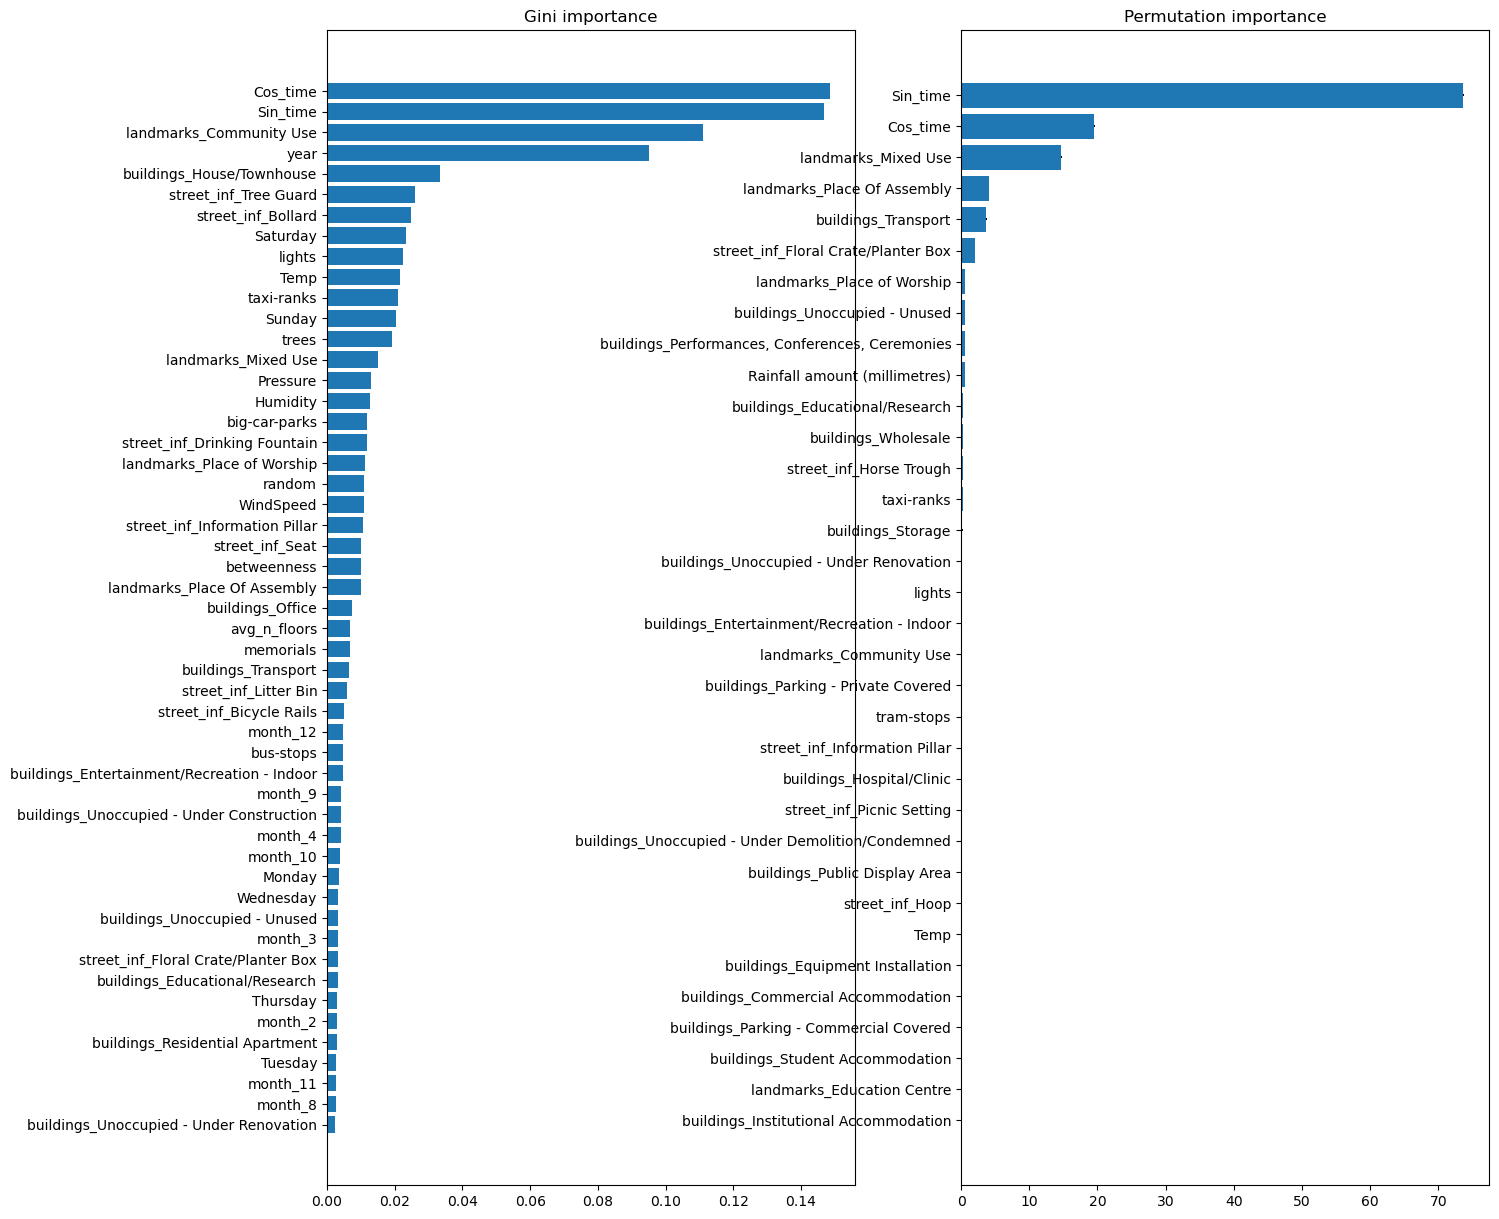

In [17]:
fig, axs = plt.subplots(ncols = 2, figsize=(15,15))
plot_compare_importances(axs, gi_1, pi_1, above_random_cat='random_cat')   

# fig, axs = plt.subplots(ncols = 2, figsize=(15,8))
# plot_compare_importances(axs, gi_2, pi_2, above_random_cat='random_cat')   

# fig, axs = plt.subplots(ncols = 2, figsize=(15,8))
# plot_compare_importances(axs, gi_3, pi_3, above_random_cat='random_cat')   

#### Think if score is negative it implies that randomly shuffled version of the variable scored better than the real variable (so doesn't imply improtance)

In [47]:
# fig, ax=plt.subplots(figsize=(10,10))
# ax.barh(range(len(pi_1['importance'])),pi_1['importance'],xerr=pi_1['Feature_importance_std'])
# ax.set_yticks(range(len(pi_1['importance'])))
# _ = ax.set_yticklabels(pi_1['feature'])  
# ax.set_title('Permutation importance');